In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [57]:
df = pd.read_csv("C:/Users/Computer/Downloads/delivery_time.csv")

In [59]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [60]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [61]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
#EDA

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [64]:
# Renaming Columns
df = df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1);

In [9]:
#Visualization

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

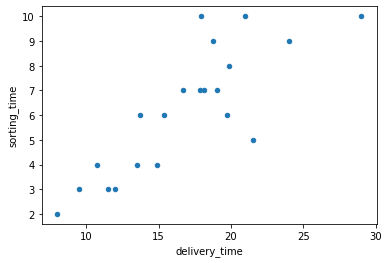

In [65]:
df.plot(kind = "scatter" , x='delivery_time' , y = 'sorting_time')

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

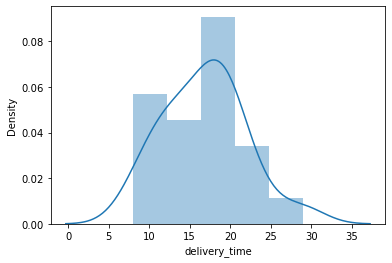

In [67]:
sns.distplot(df["delivery_time"])

C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

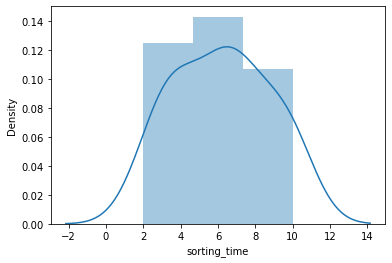

In [68]:
sns.distplot(df["sorting_time"])

<AxesSubplot:>

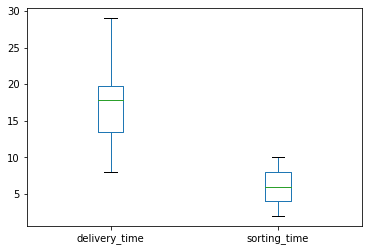

In [69]:
df.plot(kind='box')

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

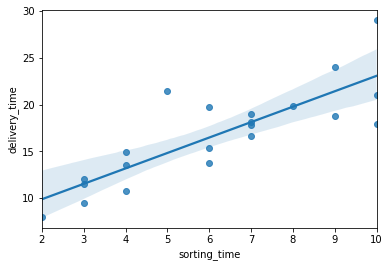

In [73]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [74]:
#Correlation Matrix

In [77]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [ ]:
#Model Building

In [78]:
model = smf.ols('delivery_time ~ sorting_time', data = df).fit()

In [79]:
#Getting important Parameters from Model

In [80]:
# Coefficients Bo and B1
Bo, B1 = model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (model.tvalues, model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (model.rsquared, model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  6.582733971997052
Sorting Time, B1:  1.6490198968312455
tvalue:  Intercept       3.823349
sorting_time    6.387447
dtype: float64
pvalue:  Intercept       0.001147
sorting_time    0.000004
dtype: float64
R2:  0.6822714748417231
R2_Adj:  0.6655489208860244


In [ ]:
#Y = 6.5827339719970555 + 1.649019896831246*X  for checking

In [81]:
predicted_time = model.predict(df.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : df.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,23.072933
1,13.50,13.178814
2,19.75,16.476853
3,24.00,21.423913
4,29.00,23.072933
5,15.35,16.476853
6,19.00,18.125873
7,9.50,11.529794
8,17.90,23.072933
9,18.75,21.423913


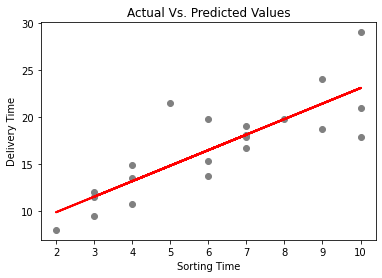

In [82]:
# Plotting Actual Vs. Predicted Values
plt.scatter(df.sorting_time, df.delivery_time,  color='gray')
plt.plot(df.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [83]:
#Calculating Errors

In [84]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(df.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(df.delivery_time, predicted_time))

Mean Absolute Error: 2.0857409551882653
Mean Squared Error: 7.793311548584063
Root Mean Squared Error: 2.7916503270617654
R^2 Score :           0.6822714748417231


In [86]:
#Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.1496009945346252
Residuals are normally distributed


C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


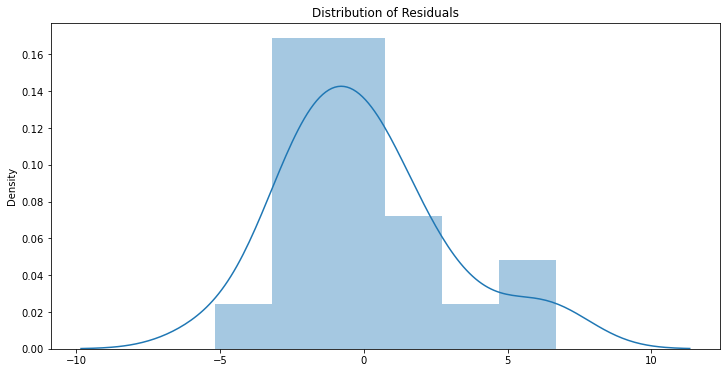

In [85]:
from statsmodels.stats.diagnostic import normal_ad
residuals = df.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [87]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           3.98e-06
Time:                        17:57:02   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:

#Building model with Logarithmic Transformation
#Y = a + b * log(x)

In [89]:
# Preparing data for model building
data = pd.DataFrame.copy(df)
data['log_sorting_time'] = np.log(data.sorting_time)
data.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


In [90]:
# Building model
log_model = smf.ols('delivery_time ~ log_sorting_time', data = data).fit()

In [91]:
#Getting important parameters from model

In [92]:
# Coefficients Bo and B1
Bo, B1 = log_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (log_model.tvalues, log_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (log_model.rsquared, log_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  1.1596835115465813
Sorting Time, B1:  9.043413458205762
tvalue:  Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
pvalue:  Intercept           0.641980
log_sorting_time    0.000003
dtype: float64
R2:  0.6954434611324223
R2_Adj:  0.6794141696130761


In [93]:
#Checking predictions of Model by equation

#From the result Bo = 1.1596835115465756 and B1 = 9.043413458205773, so our linear regression equation will become Y = Bo + B1*log(X)

Y = 1.1596835115465756 + 9.043413458205773*log(X)

In [94]:
predicted_time = log_model.predict(data.log_sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data.delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,21.00,21.982913
1,13.50,13.696517
2,19.75,17.363305
3,24.00,21.030094
4,29.00,21.982913
5,15.35,17.363305
6,19.00,18.757354
7,9.50,11.094889
8,17.90,21.982913
9,18.75,21.030094


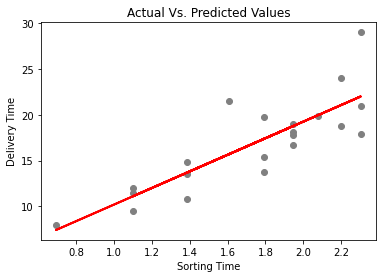

In [95]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.log_sorting_time, data.delivery_time,  color='gray')
plt.plot(data.log_sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [ ]:
#calculating Errors

In [96]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data.delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data.delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data.delivery_time, predicted_time))

Mean Absolute Error: 2.0473757067928995
Mean Squared Error: 7.470226320948425
Root Mean Squared Error: 2.733171476682066
R^2 Score :           0.6954434611324223


In [97]:
#Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.1820110432196419
Residuals are normally distributed


C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


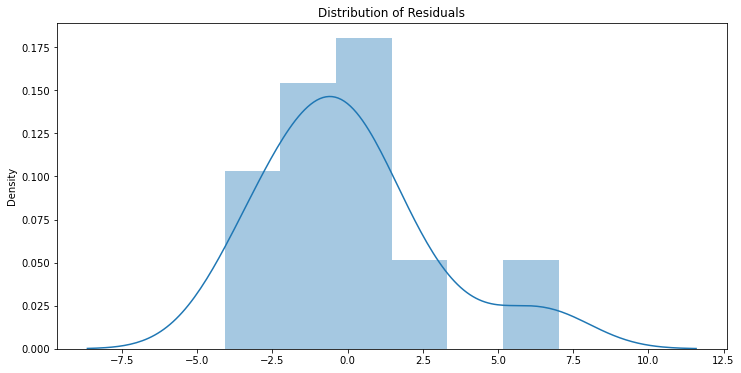

In [98]:
residuals = data.delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [99]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           2.64e-06
Time:                        18:02:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
#Building model with exponential transformation
#log(Y) =α + βX + ε

In [101]:
# preparing data to build exponential model
data['log_delivery_time'] = np.log(data.delivery_time)
data.head()

,delivery_time,sorting_time,log_sorting_time,log_delivery_time
0,21.00,10,2.302585,3.044522
1,13.50,4,1.386294,2.602690
2,19.75,6,1.791759,2.983153
3,24.00,9,2.197225,3.178054
4,29.00,10,2.302585,3.367296


In [102]:
# Building model
exp_model = smf.ols('log_delivery_time ~ sorting_time', data = data).fit()

In [103]:
#Getting important parameters from mode

In [104]:
# Coefficients Bo and B1
Bo, B1 = exp_model.params
print("Intercept, Bo: ", Bo)
print("Sorting Time, B1: ", B1)

# Getting tvalue and pvalue
tvalue, pvalue = (exp_model.tvalues, exp_model.pvalues)
print("tvalue: ", tvalue)
print("pvalue: ", pvalue)

# Getting R squared values
r_sq, r_sq_adj = (exp_model.rsquared, exp_model.rsquared_adj)
print("R2: ", r_sq)
print("R2_Adj: ", r_sq_adj)

Intercept, Bo:  2.121371854893523
Sorting Time, B1:  0.1055515979434444
tvalue:  Intercept       20.601357
sorting_time     6.836088
dtype: float64
pvalue:  Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64
R2:  0.7109478980584187
R2_Adj:  0.6957346295351776


Checking predictions of Model by equation

From the result Bo = 2.121371854893524 and B1 = 0.10555159794344435, so our linear regression equation will become log(Y) = Bo + B1X + e

log(Y) = 2.121371854893524 + 0.10555159794344435*X + e

In [105]:
predicted_time = exp_model.predict(data.sorting_time)
pred_df = pd.DataFrame({'Delivery_Time_Actual' : data.log_delivery_time, 'Delivery_Time_Predicted' : predicted_time})
pred_df

,Delivery_Time_Actual,Delivery_Time_Predicted
0,3.044522,3.176888
1,2.602690,2.543578
2,2.983153,2.754681
3,3.178054,3.071336
4,3.367296,3.176888
5,2.731115,2.754681
6,2.944439,2.860233
7,2.251292,2.438027
8,2.884801,3.176888
9,2.931194,3.071336


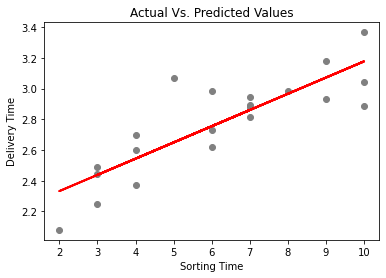

In [106]:
# Plotting Actual Vs. Predicted Values
plt.scatter(data.sorting_time, data.log_delivery_time,  color='gray')
plt.plot(data.sorting_time, predicted_time, color='red', linewidth=2)
plt.title('Actual Vs. Predicted Values')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.show()

In [107]:
#Calculating errors

In [108]:
print('Mean Absolute Error:', metrics.mean_absolute_error(data.log_delivery_time, predicted_time))  
print('Mean Squared Error:', metrics.mean_squared_error(data.log_delivery_time, predicted_time))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(data.log_delivery_time, predicted_time)))
print("R^2 Score :          ", metrics.r2_score(data.log_delivery_time, predicted_time))

Mean Absolute Error: 0.1310730556090564
Mean Squared Error: 0.027876563581789988
Root Mean Squared Error: 0.16696276106302863
R^2 Score :           0.7109478980584187


In [109]:
pred_df = pd.DataFrame({'Actual': np.exp(data.log_delivery_time), 'Predicted': np.exp(predicted_time)})
pred_df

,Actual,Predicted
0,21.00,23.972032
1,13.50,12.725123
2,19.75,15.716034
3,24.00,21.570707
4,29.00,23.972032
5,15.35,15.716034
6,19.00,17.465597
7,9.50,11.450423
8,17.90,23.972032
9,18.75,21.570707


Checking Normality of Residuals Using the Anderson-Darling test for normal distribution

p-value from the test: below 0.05 generally means non-normal: 0.8006026322922348
Residuals are normally distributed


C:\Users\Computer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


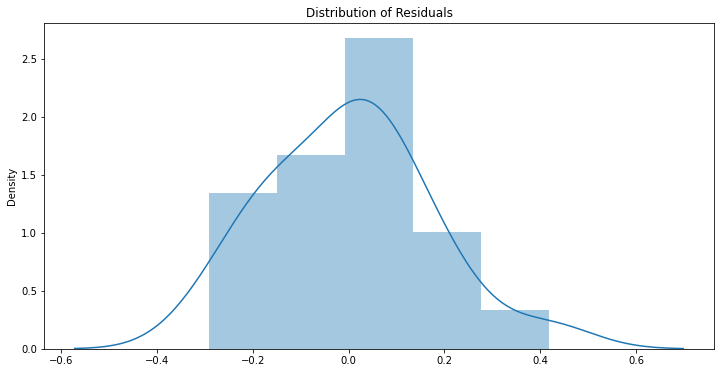

In [110]:
residuals = data.log_delivery_time - predicted_time
p_value_thresh=0.05
# Performing the test on the residuals
p_value = normal_ad(residuals)[1]
print('p-value from the test: below 0.05 generally means non-normal:', p_value)

# Reporting the normality of the residuals
if p_value < p_value_thresh:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

# Plotting the residuals distribution
plt.subplots(figsize=(12, 6))
plt.title('Distribution of Residuals')
sns.distplot(residuals)
plt.show()

In [111]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      log_delivery_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 03 Feb 2022   Prob (F-statistic):           1.59e-06
Time:                        18:12:10   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""